In [2]:
# onedrive = r"C:\Users\Mike.Kryajak\OneDrive"
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
import scipy
import re
import netCDF4 as nc
import matplotlib as mpl

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\gridtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


# from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.viewer_2d import *
from code_comparison.code_comparison import *
from code_comparison.solps_pp import *


import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.plot_solps       import plot_1d, plot_2d, plot_wall_loads
from gridtools.solps_python_scripts.read_ft44 import read_ft44
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [1]:
from solps_python_scripts.utilities.units import units
from solps_python_scripts.utilities.names import name
from solps_python_scripts.utilities.last10s import read_last10s
from solps_python_scripts.utilities.plotting import make_ticks, triplot, to_triangles
from solps_python_scripts.utilities.accessories import load_pickle, find_sp44, populate_b2, compute_integral
from solps_python_scripts.utilities.accessories import rearrange_quadrangles, rearrange_triangles

from solps_python_scripts.read_b2mn import read_b2mn
from solps_python_scripts.read_b2fgmtry import read_b2fgmtry
from solps_python_scripts.read_b2fstate import read_b2fstate
from solps_python_scripts.read_b2fplasmf import read_b2fplasmf
from solps_python_scripts.read_ft44 import read_ft44
from solps_python_scripts.read_ft46 import read_ft46
from solps_python_scripts.read_triangle_mesh import read_triangle_mesh

from solps_python_scripts.reactions.compute_rates import compute_rates

ModuleNotFoundError: No module named 'solps_python_scripts'

In [2]:
path = os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16")

In [7]:
import netCDF4 as nc
slpath = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"

self = SOLPScase(slpath)

ds = nc.Dataset(os.path.join(slpath, "balance.nc"))

leftix = ds["leftix"][:]+1
leftix_diff = np.diff(leftix[1,:])
xcut = np.argwhere(leftix_diff<0).squeeze()

# print(leftix)
print(xcut)
# [print(x) for x in ds.variables.keys()]

ds.close()

[13 37 49 68 92]


In [5]:
xcut

13

In [9]:
ds = self.bal
ds["jsep"][:][0]

17

In [4]:
print(f"Leftcut: {slc.g['leftcut']}")
print(f"Rightcut: {slc.g['rightcut']}")
print(f"Topcut: {slc.g['topcut']}")

Leftcut: [11 35]
Rightcut: [91 67]
Topcut: [17 17]


In [12]:
%matplotlib inline
plt.close("all")

In [ ]:
s["imp"]

In [45]:
# Get cell centre coordinates
R = self.g["R"] = np.mean(bal["crx"], axis=0).transpose()
Z = self.g["Z"] = np.mean(bal["cry"], axis=0).transpose()

R.shape

(112, 38)

In [11]:
ds = nc.Dataset(os.path.join(slpath, "balance.nc"))

print(ds["ne"].shape)

ds.close()

(38, 112)


In [66]:
%matplotlib widget

(38, 112)
112 38


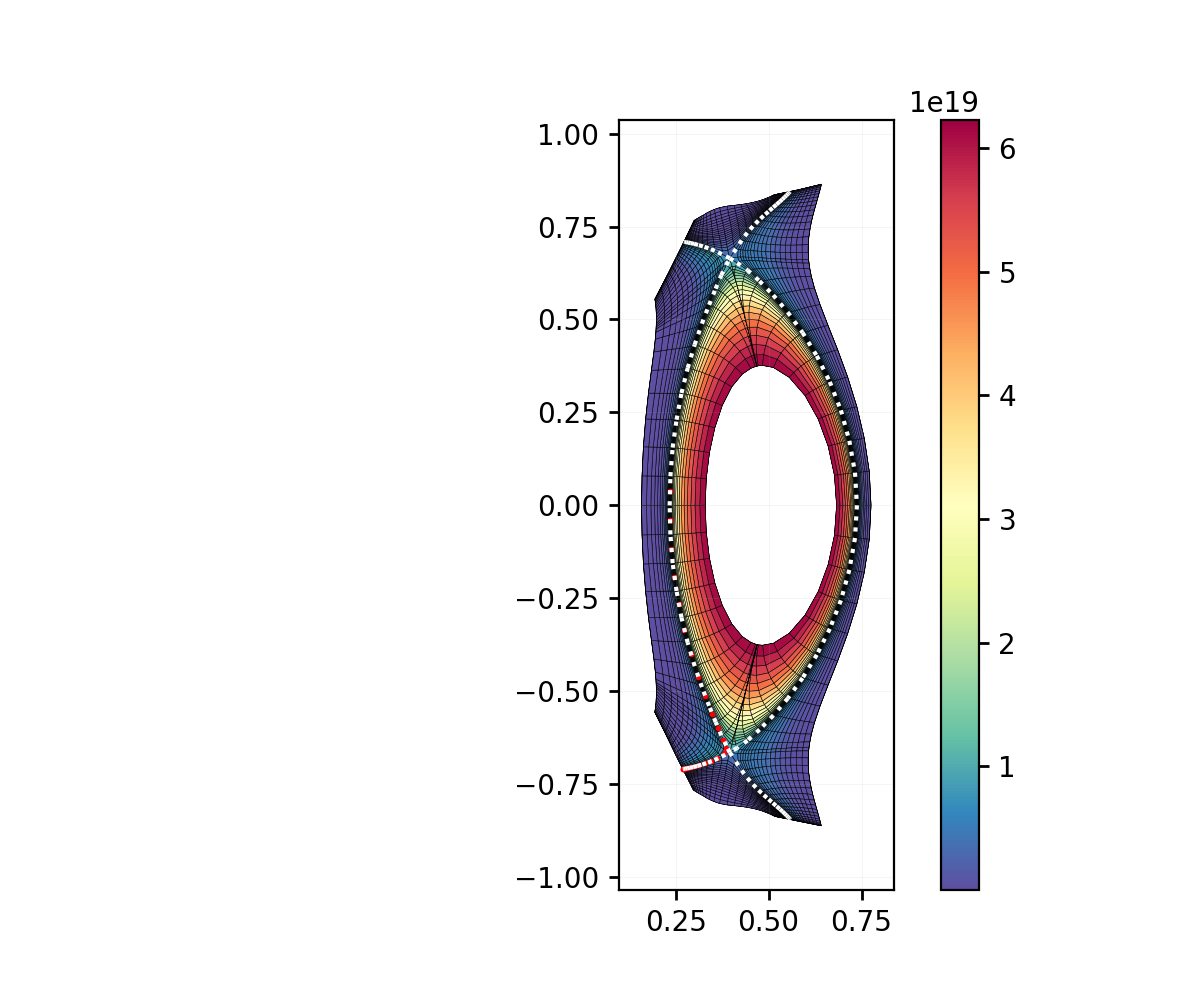

In [70]:
plt.close("all")

fig, ax = plt.subplots(dpi = 200)
self.plot_2d(ax = ax, fig = fig, param = "ne", antialias = True, linewidth = 0.2)

bal = self.bal

g = self.g = {}
        
self.g["cry"] = bal["cry"][:].transpose()
self.g["crx"] = bal["crx"][:].transpose()
self.g["nx"] = self.g["crx"].shape[0]
self.g["ny"] = self.g["crx"].shape[1]
# Get cell centre coordinates
R = self.g["R"] = np.mean(bal["crx"], axis=0).transpose()
Z = self.g["Z"] = np.mean(bal["cry"], axis=0).transpose()

leftix = bal["leftix"][:]+1
leftix_diff = np.diff(leftix[1,:])
g["xcut"] = xcut = np.argwhere(leftix_diff<0).squeeze()
g["leftcut"] = [xcut[0]-2, xcut[1]+2]
g["rightcut"] = [xcut[4]-1, xcut[3]-1]

omp = int((g["rightcut"][0] + g["rightcut"][1])/2) + 1
imp = int((g["leftcut"][0] + g["leftcut"][1])/2)
upper_break = int(imp + (omp - imp)/2) - 2
upper_break = g["xcut"][2]
sep = bal["jsep"][:][0] + 2
        # sep = min(g["topcut"][0], g["topcut"][1]) +1

s = {}
s["imp"] = [imp, slice(None,None)]
s["omp"] = [omp, slice(None,None)]
s["outer"] = [slice(upper_break,None), sep]
s["outer_lower"] = [slice(omp,None), sep]
s["outer_upper"] = [slice(upper_break, omp), sep]
s["inner"] = [slice(None, upper_break-1), sep]
s["inner_lower"] = [slice(None, imp+1), sep]
s["inner_upper"] = [slice(imp, upper_break-1), sep]
sel = s["inner_lower"]
ax.scatter(R[sel[0], sel[1]], Z[sel[0], sel[1]], s = 1, c = "r")
self.plot_separatrix(ax, ls = ":")

# ax.set_ylim(-0.9, 0.1)

In [6]:
leftix_diff[leftix_diff < 0]

masked_array(data=[-79, -31, -49, -31, -79],
             mask=False,
       fill_value=999999)